K=2|inertia=16164.64|Silhouette =0.584
K=3|inertia=3803.76|Silhouette =0.740
K=4|inertia=1366.40|Silhouette =0.748
K=5|inertia=1233.32|Silhouette =0.627
K=6|inertia=1105.60|Silhouette =0.508
K=7|inertia=985.44|Silhouette =0.465
K=8|inertia=853.99|Silhouette =0.347


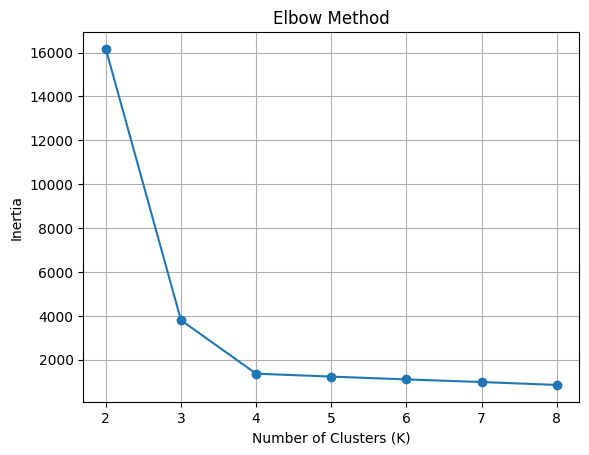

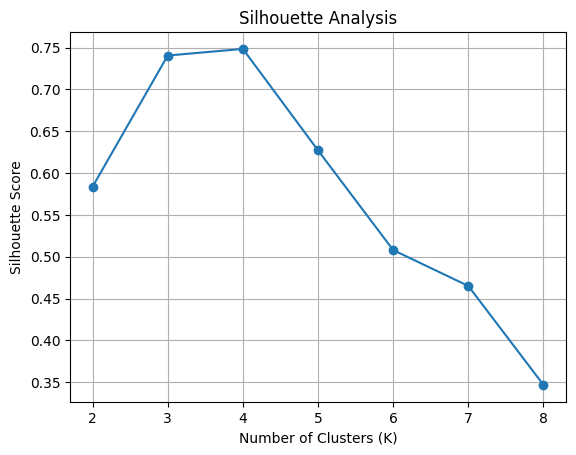

Optimal number of clusters (K): 4
Final Silhouette Score: 0.7483022600632055


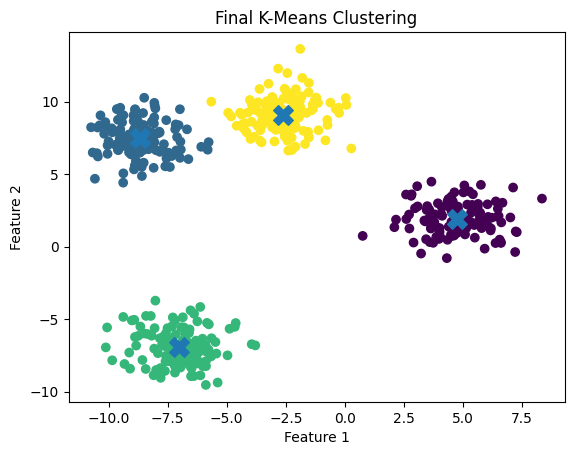

In [5]:
# ==============================
# 1. Import required libraries
# ==============================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ==============================
# 2. Generate synthetic dataset
# ==============================
X, y_true = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=1.2,
    random_state=42
)

# ==============================
# 3. Find optimal K using Elbow & Silhouette
# ==============================
k_range = range(2, 9)
inertia_values = []
silhouette_values = []

for k in k_range:
    model = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10,
        random_state=42
    )
    labels=model.fit_predict(X)
    inertia_values.append(model.inertia_)
    silhouette_values.append(silhouette_score(X, labels))

    print(f"K={k}|inertia={model.inertia_:.2f}|Silhouette ={silhouette_score(X, labels):.3f}")
# ==============================
# 4. Plot Elbow Method (Inertia)
# ==============================
plt.figure()
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# ==============================
# 5. Plot Silhouette Scores
# ==============================
plt.figure()
plt.plot(k_range, silhouette_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)
plt.show()

# ==============================
# 6. Select optimal K
# ==============================
optimal_k = k_range[np.argmax(silhouette_values)]
print("Optimal number of clusters (K):", optimal_k)

# ==============================
# 7. Final K-Means clustering
# ==============================
final_model = KMeans(
    n_clusters=optimal_k,
    init='k-means++',
    n_init=10,
    random_state=42
)

labels = final_model.fit_predict(X)

# ==============================
# 8. Final Silhouette Score
# ==============================
final_silhouette = silhouette_score(X, labels)
print("Final Silhouette Score:", final_silhouette)

# ==============================
# 9. Scatter plot of clustered data
# ==============================
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(
    final_model.cluster_centers_[:, 0],
    final_model.cluster_centers_[:, 1],
    s=200,
    marker='X'
)
plt.title('Final K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()